# Publications Per Professor Per Research Fields

This experiment aims to analyze publication trends among Machine Learning professors and research fields by generating individualized plots for each academic, thereby offering a personalized signal indicative of the respective professor's scholarly output. 


In [15]:
import ast
import imageio
import numpy as np
import pandas as pd
from tqdm import tqdm
from tueplots import bundles
import matplotlib.pyplot as plt
from IPython.display import Image
from tueplots.constants.color import rgb

plt.rcParams.update(bundles.beamer_moml())
plt.rcParams.update({"figure.dpi": 300})

In [4]:
research_fields = [
    'Computer Vision',
    'Robotics',
    'Bioinformatics and Computational Biology',
    'Human-Computer Interaction',
    'Design Automation of Microelectronic Systems (EDA)',
    'Visualization', 
    'Web Information Retrieval',
    'Natural Language Processing',
    'Machine Learning', 
]

sorted_research_fields = ["Machine Learning", "Computer Vision", "Robotics", "Bioinformatics and Computational Biology", "Human-Computer Interaction", "Visualization", "Design Automation of Microelectronic Systems (EDA)", "Web Information Retrieval", "Natural Language Processing"]
sorted_colors = [rgb.tue_darkgreen, rgb.pn_orange, rgb.tue_darkblue, rgb.tue_lightblue, rgb.tue_brown, rgb.tue_blue, rgb.tue_green, rgb.tue_dark, rgb.tue_red]

In [24]:
df = pd.read_csv("./../dat/ClassifiedPublications.csv")
df = df[df['Research Fields'].apply(lambda x: len(ast.literal_eval(x)) > 0)]

years = range(df['Year'].min(), df['Year'].max() + 1)
professors = df["Professor"].unique()

# Create colors dict (used for plotting)
colors = dict(zip(sorted_research_fields, sorted_colors))

# Create a plot for each professor with number of publications per year and per reserach field
for professor in tqdm(professors, desc="Creating Plot for each Professor"):
    # Get professor df
    professor_df = df[df['Professor'] == professor]

    # Calulate number of publications per year per reserach field
    research_field_counts = {research_field: [0] * len(years) for research_field in research_fields}
    for i, row in professor_df.iterrows():
        for research_field in ast.literal_eval(row['Research Fields']):
            research_field_counts[research_field][row['Year'] - min(years)] += 1
    
    fig, ax = plt.subplots()

    # Draw lines
    for research_field in research_fields:
        if sum(research_field_counts[research_field]) > 10:
            ax.plot(years, research_field_counts[research_field], '.-', ms=3, lw=0.75, color=colors[research_field], label=research_field)
    
    ax.set_ylim([0, 70])
    ax.yaxis.set_major_locator(plt.MultipleLocator(10))
    ax.grid(axis="y", which="major", color=rgb.tue_dark, linewidth=0.5)
    
    ax.set_xlim([years[0] - 0.5, years[-1] + 1])
    ax.set_xticks(years)
    ax.tick_params(axis='x', rotation=90)
    
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Publications')
    ax.set_title(f'Publications by Prof. {professor} Per Research Fields')
    ax.legend(loc="upper left", framealpha=1, facecolor="white", frameon=True, fontsize='x-small')
    
    plt.close()

    fig.savefig(f'./../plt/PublicationsPerProfessorPerResearchFields/{professor}.png')

Creating Plot for each Professor: 100%|████████████████████████████████████████████████| 27/27 [00:15<00:00,  1.69it/s]


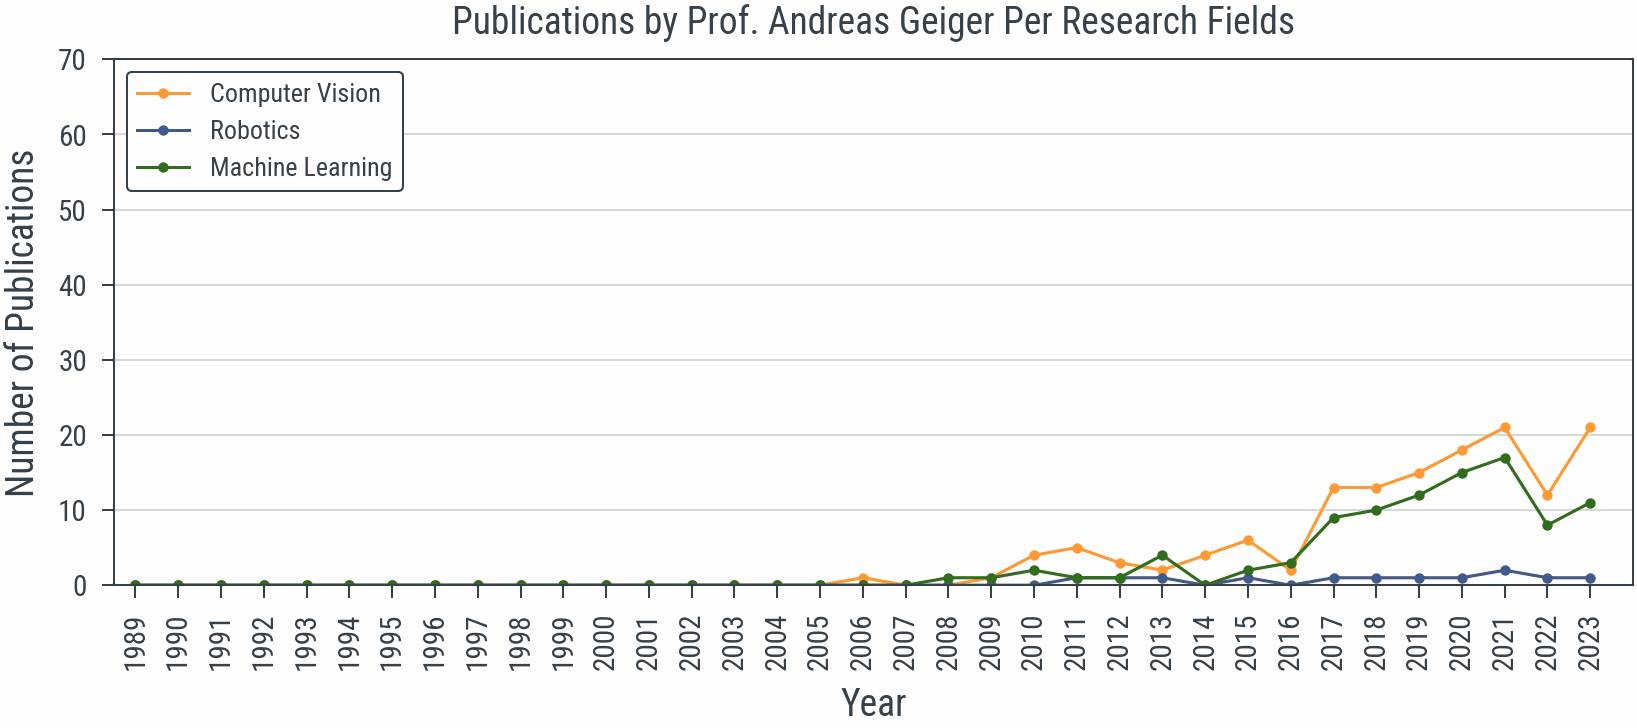

In [21]:
# Create a gif combining plots of all professors
png_dir = './../plt/PublicationsPerProfessorPerResearchFields/'
png_files = [f for f in os.listdir(png_dir) if f.endswith('.png')]

frames = []
for png_file in png_files:
    frames.append(imageio.v2.imread(os.path.join(png_dir, png_file)))

imageio.mimsave('./../plt/PublicationsPerProfessorPerResearchFields/PublicationsPerProfessor.gif', frames, fps=1, loop=0)

Image(filename='./../plt/PublicationsPerProfessorPerResearchFields/PublicationsPerProfessor.gif')